<a href="https://colab.research.google.com/github/hackermatrix/Neural-Networks/blob/main/SimpleNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  #INput Layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # Output (3 classes of iris flower)

  def __init__(self, in_features=4,h1=8, h2=9, out_features=3):
    super().__init__() # instantiate out nn.Module
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Change last columns from strings to int
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)


In [ ]:
X = my_df.drop('species',axis =1 )
Y = my_df['species']

In [ ]:
# Convert these to numpy arrays
X = X.values
Y = Y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train Test Split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=25)

In [ ]:
# Convert X data to Float Tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [ ]:
# Convert y labels to tensor long
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)


In [ ]:
# Set the Criterion of model  to measure Error
criterion = nn.CrossEntropyLoss()
# Choosing Adam Optimizer , lr i.e learning rate of the model
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
# Train our model
epochs = 1000
losses = []

for i in range(epochs):
  # Go forward and get a prediction
  Y_pred = model.forward(X_train) # Get predicted Results

  # Measure the loss/error
  loss = criterion(Y_pred,Y_train) #  Predicted values vs the Y_train

  # Keep Trach of out losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i%10 == 0 :
    print(f"Epoch: {i} and loss: {loss}")

  # Do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 0.9572200775146484
Epoch: 10 and loss: 0.9264551997184753
Epoch: 20 and loss: 0.8925918340682983
Epoch: 30 and loss: 0.854829728603363
Epoch: 40 and loss: 0.8137770295143127
Epoch: 50 and loss: 0.7709556818008423
Epoch: 60 and loss: 0.730648398399353
Epoch: 70 and loss: 0.6934369206428528
Epoch: 80 and loss: 0.6593233942985535
Epoch: 90 and loss: 0.6277225613594055
Epoch: 100 and loss: 0.5980075597763062
Epoch: 110 and loss: 0.5699834823608398
Epoch: 120 and loss: 0.543448269367218
Epoch: 130 and loss: 0.5181557536125183
Epoch: 140 and loss: 0.49388569593429565
Epoch: 150 and loss: 0.46985533833503723
Epoch: 160 and loss: 0.44589322805404663
Epoch: 170 and loss: 0.4226751923561096
Epoch: 180 and loss: 0.40219879150390625
Epoch: 190 and loss: 0.38283076882362366
Epoch: 200 and loss: 0.3647717237472534
Epoch: 210 and loss: 0.34780967235565186
Epoch: 220 and loss: 0.33181726932525635
Epoch: 230 and loss: 0.3167153298854828
Epoch: 240 and loss: 0.30239829421043396
Epoch:

Text(0.5, 0, 'Epoch')

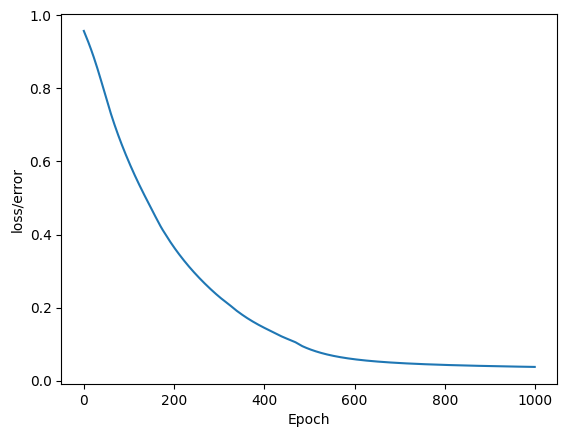

In [ ]:
# Graph plotting
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [ ]:
# Evaluate Model
with torch.no_grad(): # Turns off backpropagation
  Y_eval = model.forward(X_test)
  loss = criterion(Y_eval,Y_test)

In [ ]:
loss

tensor(0.0937)

In [ ]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    Y_val = model.forward(data)

    print(f"{i+1}.) {str(Y_val)} \t {Y_test[i]} \t {Y_val.argmax().item()}")

    if(Y_val.argmax().item() == Y_test[i]):
      correct+=1

print(f"WE got {correct} correct!")

1.) tensor([ 10.2278,   1.9225, -12.1173]) 	 0 	 0
2.) tensor([-3.7238,  4.9159,  4.2741]) 	 1 	 1
3.) tensor([-3.8373,  4.3743,  4.8798]) 	 1 	 2
4.) tensor([-2.2586,  5.8911,  0.9301]) 	 1 	 1
5.) tensor([-6.3563,  2.5824, 10.8937]) 	 2 	 2
6.) tensor([-1.4435,  7.0007, -1.1482]) 	 1 	 1
7.) tensor([-4.1882,  4.3112,  5.5567]) 	 2 	 2
8.) tensor([  9.5363,   1.5423, -11.1752]) 	 0 	 0
9.) tensor([-0.1224,  5.6315, -2.0442]) 	 1 	 1
10.) tensor([ 0.2979,  5.1512, -2.3124]) 	 1 	 1
11.) tensor([  9.5593,   2.0861, -11.4379]) 	 0 	 0
12.) tensor([  9.2889,   2.4409, -11.2833]) 	 0 	 0
13.) tensor([  8.7479,   2.2883, -10.6088]) 	 0 	 0
14.) tensor([-3.7094,  4.8474,  4.3070]) 	 2 	 1
15.) tensor([  9.3524,   1.7635, -11.0646]) 	 0 	 0
16.) tensor([-1.7737,  6.9253, -0.6828]) 	 1 	 1
17.) tensor([-5.4468,  4.2926,  7.8625]) 	 2 	 2
18.) tensor([-5.6089,  4.0437,  8.3195]) 	 2 	 2
19.) tensor([-0.2538,  5.8146, -1.9805]) 	 1 	 1
20.) tensor([-1.8059,  5.8148,  0.1556]) 	 1 	 1
21.) tensor

In [ ]:
torch.save(model.state_dict(),"My_Iris_pred_model.pt")

In [ ]:
# Load the savel model
new_model = Model()
new_model.load_state_dict(torch.load('My_Iris_pred_model.pt'))

<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)